<a href="https://colab.research.google.com/github/AadhiX458/24BAD003_ML-EXP-3/blob/main/LIC_STOCK_PRICE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving LICI - 10 minute data.csv to LICI - 10 minute data.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score
)


In [ ]:
df = pd.read_csv("LICI - 10 minute data.csv")
df

,date,open,high,low,close,volume
0,2022-05-17 09:35:00+05:30,872.00,872.00,872.00,872.00,3759243
1,2022-05-17 09:45:00+05:30,872.00,872.00,872.00,872.00,0
2,2022-05-17 09:55:00+05:30,872.00,918.10,862.00,902.80,12449251
3,2022-05-17 10:05:00+05:30,902.45,908.95,896.00,902.15,5237329
4,2022-05-17 10:15:00+05:30,902.30,905.00,900.00,903.85,1820317
...,...,...,...,...,...,...
3679,2022-10-13 14:45:00+05:30,611.50,612.00,611.25,611.85,11190
3680,2022-10-13 14:55:00+05:30,611.75,611.95,611.55,611.85,15446
3681,2022-10-13 15:05:00+05:30,611.60,611.95,611.30,611.40,24264
3682,2022-10-13 15:15:00+05:30,611.60,612.00,611.05,611.60,41148


In [ ]:
df.head()

,date,open,high,low,close,volume
0,2022-05-17 09:35:00+05:30,872.00,872.00,872.0,872.00,3759243
1,2022-05-17 09:45:00+05:30,872.00,872.00,872.0,872.00,0
2,2022-05-17 09:55:00+05:30,872.00,918.10,862.0,902.80,12449251
3,2022-05-17 10:05:00+05:30,902.45,908.95,896.0,902.15,5237329
4,2022-05-17 10:15:00+05:30,902.30,905.00,900.0,903.85,1820317


In [ ]:
df.tail()

,date,open,high,low,close,volume
3679,2022-10-13 14:45:00+05:30,611.50,612.00,611.25,611.85,11190
3680,2022-10-13 14:55:00+05:30,611.75,611.95,611.55,611.85,15446
3681,2022-10-13 15:05:00+05:30,611.60,611.95,611.30,611.40,24264
3682,2022-10-13 15:15:00+05:30,611.60,612.00,611.05,611.60,41148
3683,2022-10-13 15:25:00+05:30,611.60,611.80,611.20,611.50,15685


In [ ]:
df.describe()

,open,high,low,close,volume
count,3684.000000,3684.000000,3684.000000,3684.000000,3.684000e+03
mean,694.709718,695.575679,693.738871,694.598588,7.014561e+04
std,63.481439,63.755377,63.166795,63.428558,2.639151e+05
min,611.400000,611.800000,611.000000,611.250000,0.000000e+00
25%,658.275000,659.500000,657.250000,658.125000,1.659125e+04
50%,676.225000,677.000000,675.375000,676.125000,3.025700e+04
75%,699.850000,700.612500,699.000000,699.800000,6.085100e+04
max,903.850000,918.100000,900.000000,903.850000,1.244925e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3684 entries, 0 to 3683
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    3684 non-null   object 
 1   open    3684 non-null   float64
 2   high    3684 non-null   float64
 3   low     3684 non-null   float64
 4   close   3684 non-null   float64
 5   volume  3684 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 172.8+ KB


In [ ]:
df["Price_Movement"] = np.where(df["close"] > df["open"], 1, 0)

In [ ]:
df.isnull().sum()

,0
date,0
open,0
high,0
low,0
close,0
volume,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
X = df[["open", "high", "low", "volume"]]
y = df["Price_Movement"]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [ ]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-Score :", f1_score(y_test, y_pred))

Accuracy : 0.5888738127544098
Precision: 1.0
Recall   : 0.013029315960912053
F1-Score : 0.02572347266881029


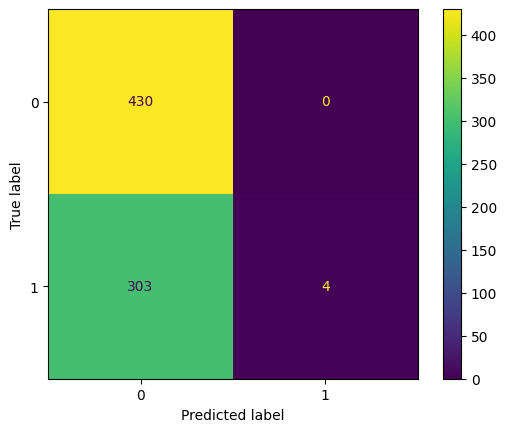

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

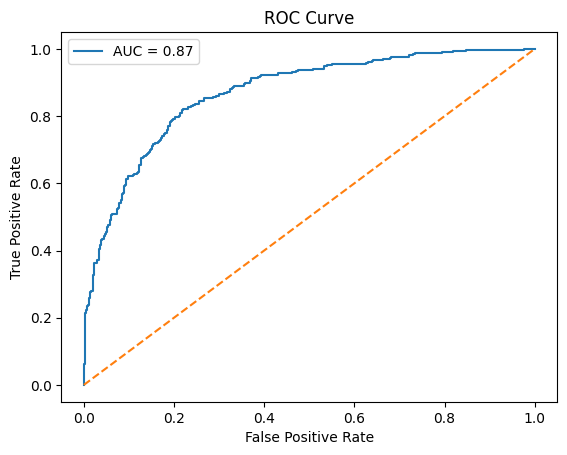

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

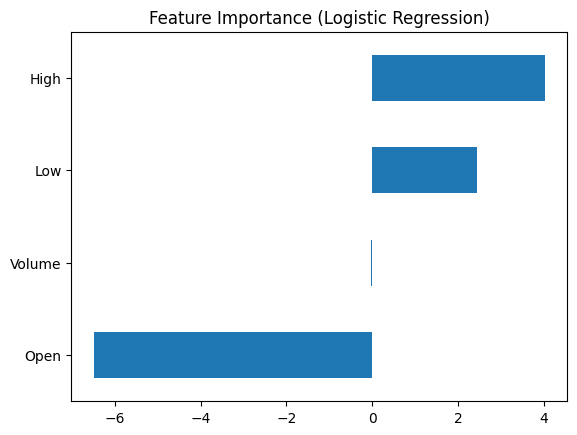

In [ ]:
feature_importance = pd.Series(
    model.coef_[0],
    index=["Open", "High", "Low", "Volume"]
)

feature_importance.sort_values().plot(kind="barh")
plt.title("Feature Importance (Logistic Regression)")
plt.show()

In [ ]:
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear"]
}

grid = GridSearchCV(
    LogisticRegression(),
    param_grid,
    cv=5,
    scoring="f1"
)

grid.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='f1')

In [ ]:
print("Best Parameters:", grid.best_params_)

Best Parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Optimized Accuracy :", accuracy_score(y_test, y_pred_best))
print("Optimized Precision:", precision_score(y_test, y_pred_best))
print("Optimized Recall   :", recall_score(y_test, y_pred_best))
print("Optimized F1-Score :", f1_score(y_test, y_pred_best))


Optimized Accuracy : 0.7964721845318861
Optimized Precision: 0.7813620071684588
Optimized Recall   : 0.7100977198697068
Optimized F1-Score : 0.7440273037542662
